# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
#use this cell to import additional libraries or define helper functions
import seaborn as sns

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [103]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

C:\Users\tehwh\AppData\Local\Temp\ipykernel_12388\43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [104]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [105]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [106]:
df_raw.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [107]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [108]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [109]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

In [110]:
print(df['Datetime'].dtype)

datetime64[ns]


In [111]:
print(df['Datetime'].head())

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: Datetime, dtype: datetime64[ns]


## `I had to add all of these extra cells because, for some reason I was getting plenty of errors.`

####  `Here is my next question, why are we combining the date and the time cols, when you can just combine them to make a new col, and then just re-order the date? Keeping all three columns this is where all of my errors are coming from`

In [112]:
#convert all data columns to numeric types
df = df.apply(pd.to_numeric)

ValueError: Unable to parse string "16/12/2006" at position 0

In [113]:
df.dtypes

Date                             object
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [114]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [115]:
df.dtypes

Date                             object
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [116]:
df.Date[0]

datetime.date(2006, 12, 16)

In [117]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [118]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [119]:
desc = df.describe(include='all')
desc

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06,2075259
unique,1442,1440,6534,896,5168,377,153,145,NaN,NaN
top,2008-12-06,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00,2008-12-06 07:12:59.999994112
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2006-12-16 17:24:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2007-12-12 00:18:30
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2008-12-06 07:13:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01,2009-12-01 14:07:30
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+01,2010-11-26 21:02:00


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

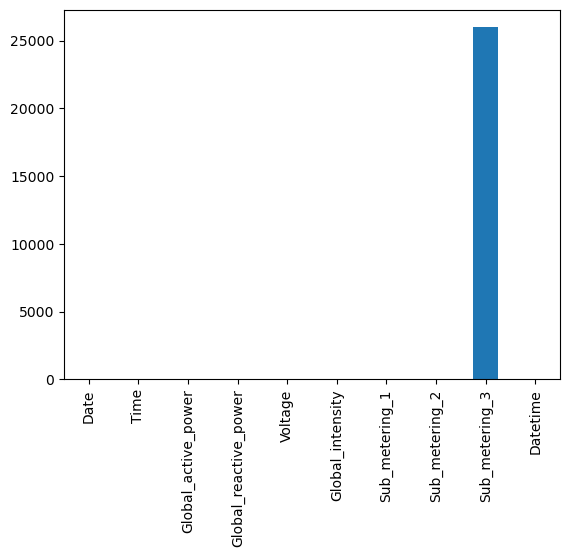

In [120]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

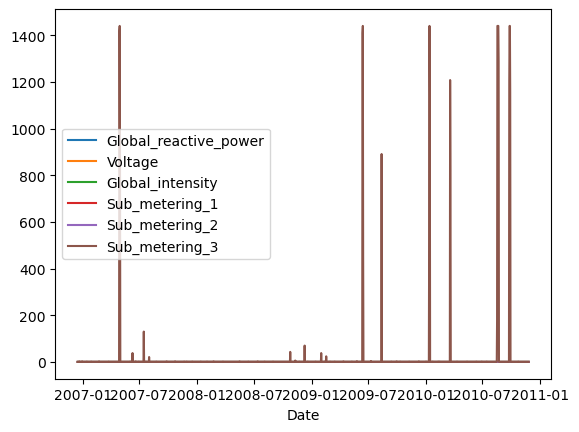

In [121]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: `What I see is that there are 6 kinds of data that are being presented on the chart and sub metering 3 has the largest skewness, and some of the greatest outliers, which means that the subgroup three has the most missing data`

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: `Well, my first thought would be to drop the sub_metering_3 Col, or Change that date to be binary for the date of the usage. But I would honestly just put the median in for the missing data, but there should always be some sort of context to this data if it is mission critical or not...`

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [122]:
#clean up missing data here

# median of the group 3 col
median_sub_metering_3 = df['Sub_metering_3'].median()

# filling in the missing vals with the median
df['Sub_metering_3'].fillna(median_sub_metering_3, inplace=True)

In [123]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: Well all of these are going to have the date component to them. 

Date - to see how the time goes with the events and the measurements
Global reactive power - because it seems like it may be a macro event, or measure. 
Voltage- Volatage is important when dealing with electricity
Globaly intensity - I have no clue what the data means, but after looking it up, I think that it Would be intresting to see how the data changes for the households power consumption over the time span.

In [124]:
print(df.dtypes)

Date                             object
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object


In [129]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## I still had to deal with the data not being correct, so I fixed it again here

In [125]:
# Cols I want to convert to numeric
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

# for loop 
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

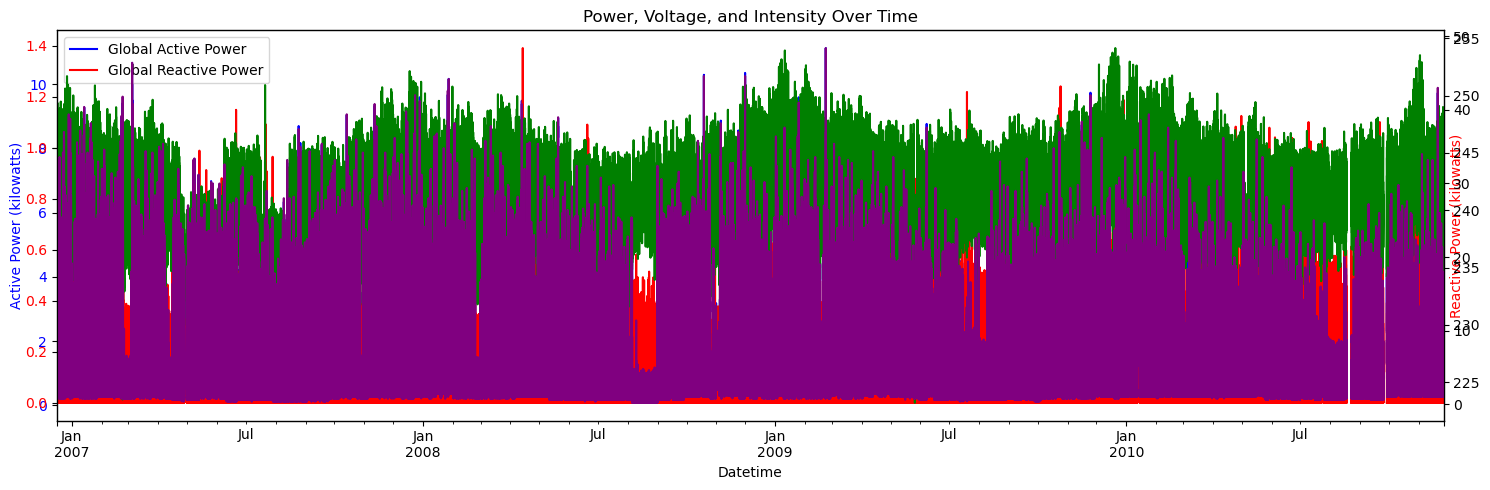

In [126]:
#build your line chart here 

## I am going to have to change soime of the data to fit first...

df.set_index('Datetime', inplace=True)
fig, ax1 = plt.subplots(figsize=(15, 5))
df['Global_active_power'].plot(ax=ax1, color='blue', label='Global Active Power')
ax1.set_ylabel('Active Power (kilowatts)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
df['Global_reactive_power'].plot(ax=ax2, color='red', label='Global Reactive Power')
ax2.set_ylabel('Reactive Power (kilowatts)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
df['Voltage'].plot(ax=ax1, color='green', secondary_y=True, label='Voltage')
df['Global_intensity'].plot(ax=ax2, color='purple', secondary_y=True, label='Global Intensity')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Power, Voltage, and Intensity Over Time')
plt.tight_layout()
plt.show()

In [130]:
df.reset_index(inplace=True)

In [131]:
df.columns

Index(['Datetime', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: Kind of, but not really, I don't know the backstory behind the data but I could see how this might be useful to see some of the gaps within the data, and where the data is for the time frames. 

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [132]:
df.columns

Index(['Datetime', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [138]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

df['Datetime'] = pd.to_datetime(df['Datetime'])
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
monthly_df = df.groupby(df['Datetime'].dt.to_period('M'))[numeric_cols].mean()
monthly_df.index = monthly_df.index.to_timestamp()
long_df = monthly_df.reset_index().melt(id_vars='Datetime', var_name='Variable', value_name='Value')

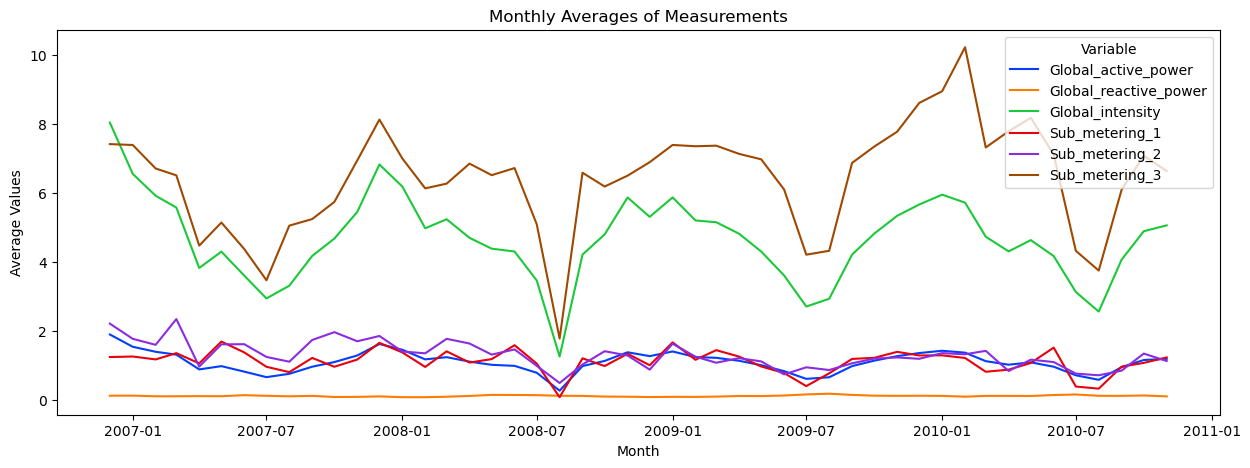

In [139]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=long_df, x='Datetime', y='Value', hue='Variable', palette='bright')
plt.title('Monthly Averages of Measurements')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.legend(title='Variable', loc='upper right')
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Yes the variables do tend to move together, I had to remove the voltage, because it was skewing the chart a little bit. But with that being said, they do move around with each other, except for the global reacvtive power, that tends to stay flat. 

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [144]:
# Assuming the data is recorded every minute, setting rolling window size for 30 days
window_size = 30 * 24 * 60  # 30 days * 24 hours/day * 60 minutes/hour

# Compute the rolling mean for each column
df_rolling = df.set_index('Datetime')[numeric_cols].rolling(window=window_size, min_periods=1).mean()

# Reset index to bring 'Datetime' back to a column
df_rolling = df_rolling.reset_index()

# Reshape for seaborn
long_df_rolling = df_rolling.melt(id_vars='Datetime', var_name='Variable', value_name='Value')


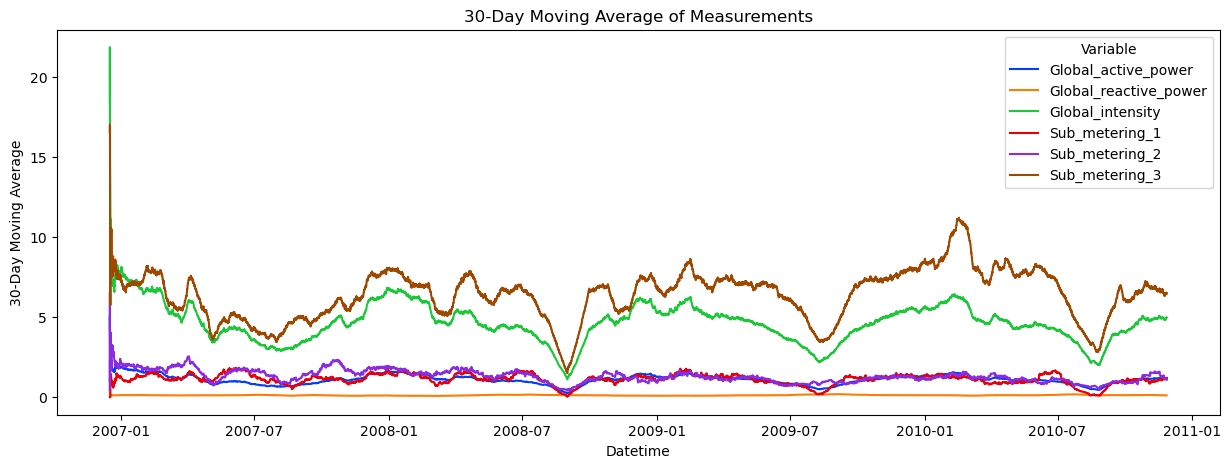

In [145]:
#build your line chart on the moving average here

# Plotting using seaborn
plt.figure(figsize=(15, 5))
sns.lineplot(data=long_df_rolling, x='Datetime', y='Value', hue='Variable', palette='bright')
plt.title('30-Day Moving Average of Measurements')
plt.xlabel('Datetime')
plt.ylabel('30-Day Moving Average')
plt.legend(title='Variable', loc='upper right')
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: I think that the 30 day moving average is more effective, due to the fact that you are able to see some more grainular data. Kind of reminds me of a 5 min moving average when stock trading. 

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

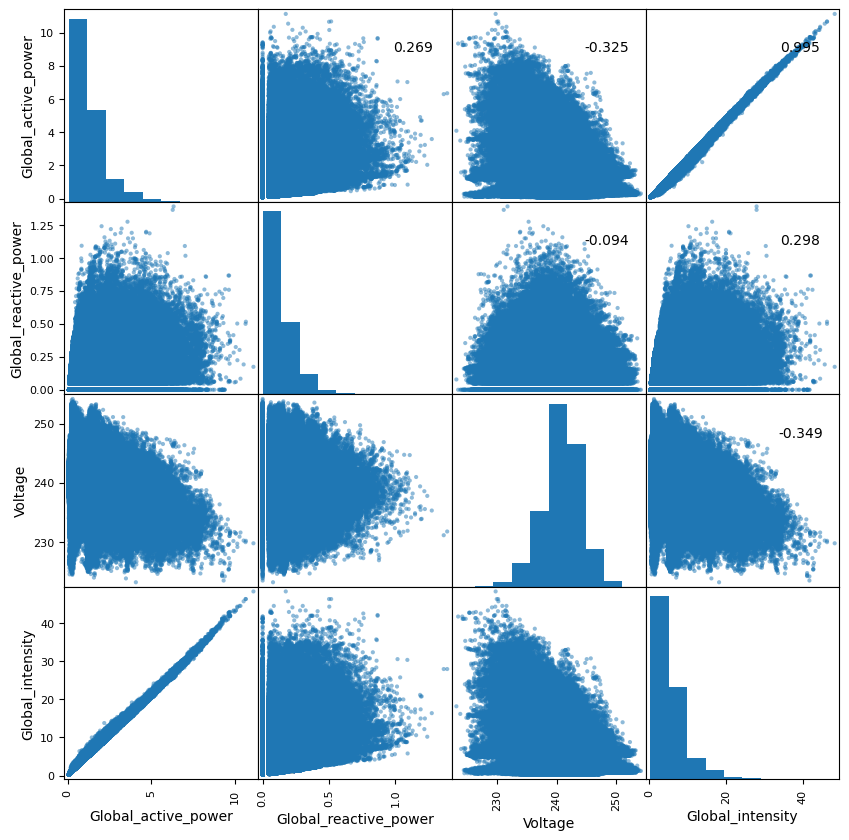

In [146]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: Global active power, global reactive power, and the global intensity are all skewed left, And the global active power, and the global intensity both seem to have a very linear relationship. But With that being said, we can look into the relationship and how they effect eachother down the road. But I would start by looking into the global intensity, and the global active power first. 